'''
Custom OCR Project - Image Preprocessing and YOLO Object Detection
---------------------------------------------------------------
This script preprocesses images by converting them to grayscale, applying Gaussian blur, 
and performing thresholding to enhance text clarity for OCR processing.
Additionally, it loads a YOLO model to detect objects in a given image and visualizes the detections.
'''

In [2]:
# Import necessary libraries
import cv2  # OpenCV for image processing
import os  # OS module for file handling
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for image visualization

# Step 1: Define Paths

In [4]:
# Path to the folder containing raw images
IMAGE_FOLDER = r"C:\Users\hp\project 10\raw_images"
# Path to the folder where preprocessed images will be saved
PREPROCESSED_FOLDER = r"C:\Users\hp\project 10\preprocessed_images"

# Ensure the preprocessed images folder exists
if not os.path.exists(PREPROCESSED_FOLDER):
    os.makedirs(PREPROCESSED_FOLDER)

# Path to YOLO model files
yolo_cfg = r"C:\Users\hp\project 10\yolo_model\yolov3.cfg"
yolo_weights = r"C:\Users\hp\project 10\yolo_model\yolov3.weights"
yolo_classes = r"C:\Users\hp\project 10\yolo_model\coco.names"

# Step 2: Function to Preprocess an Image

In [6]:
def preprocess_image(image_path, save_path):
    '''
    This function loads an image, converts it to grayscale, applies Gaussian blur,
    and performs thresholding to enhance text clarity. The processed image is then saved.
    '''
    image = cv2.imread(image_path)  # Load image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Apply Gaussian blur
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Apply Otsu's thresholding
    
    # Save the processed image
    processed_image_path = os.path.join(save_path, os.path.basename(image_path))
    cv2.imwrite(processed_image_path, thresh)
    
    return thresh

# Step 3: Process All Images in the Folder

In [8]:
# Get list of all image files in the raw images folder
image_files = os.listdir(IMAGE_FOLDER)
for img_file in image_files:
    img_path = os.path.join(IMAGE_FOLDER, img_file)
    preprocess_image(img_path, PREPROCESSED_FOLDER)

print("Data preprocessing complete. Preprocessed images saved.")

Data preprocessing complete. Preprocessed images saved.


# Step 4: Load YOLO Model and Detect Objects

✅ Image loaded successfully!
✅ Object detected with confidence: 0.59


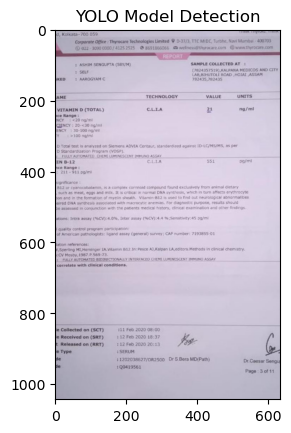

In [10]:
# Load YOLO model
net = cv2.dnn.readNet(yolo_weights, yolo_cfg)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Select an image for object detection
image_path = os.path.join(IMAGE_FOLDER, "thyrocare_0_36.jpg")

if not os.path.exists(image_path):
    print(f"❌ Error: Image file '{image_path}' not found.")
else:
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"❌ Error: Unable to load image '{image_path}'.")
    else:
        print("✅ Image loaded successfully!")

        # Prepare image for YOLO detection
        height, width, channels = image.shape
        blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)
        outputs = net.forward(output_layers)

        # Process detections
        for output in outputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:  # Threshold for detection
                    print(f"✅ Object detected with confidence: {confidence:.2f}")

        # Display Image with Matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("YOLO Model Detection")
        plt.show()